<a href="https://colab.research.google.com/github/coderaadi1/ML_using_tensorflow/blob/main/bagging_with_random_data1(bagging%20classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

In [3]:
def get_dataset():
  x,y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 5)
  return x,y

In [4]:
def get_models():
  models = dict()
  n_trees = [ 10,50,100,500,1000,500]
  for n in n_trees:
    models[str(n)] = BaggingClassifier(n_estimators = n)
  return models

In [5]:
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [10]:
x, y = get_dataset()
models = get_models()

>10 0.865 (0.037)
>50 0.878 (0.036)
>100 0.878 (0.038)
>500 0.885 (0.035)
>1000 0.886 (0.040)


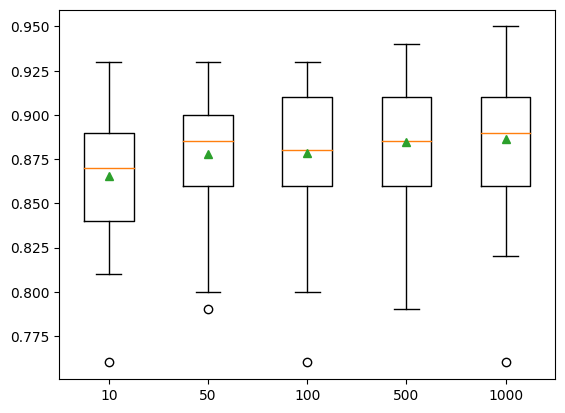

In [11]:
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, x, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()